# Exploring Dandiset 000563: Allen Institute Openscope – Barcoding (Version 0.250311.2145)

**Caution:**  
This notebook was generated by AI and has not been verified by a human expert. Users should exercise caution in interpreting results or reusing code—please carefully check all critical steps for your application.

## Dandiset Overview

- **Name:** Allen Institute Openscope - Barcoding
- **Description:**  
  Visual neuroscience data recorded using high-density Neuropixels probes in mouse cortex and subcortical regions. The experiment employs white noise visual stimulation in both full-field and grating formats to drive temporally precise ("barcoding") activity patterns in visual and downstream brain areas. Key subject details: male, transgenic mouse, Pvalb-IRES-Cre background.
- **Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, inhibitory/excitatory, barcoding, temporal precision  
- **Number of files:** 94 (across subjects, sessions, and probe recordings)

[View this Dandiset on DANDI Archive](https://dandiarchive.org/dandiset/000563/0.250311.2145)

## What this notebook covers

- How to load Dandiset metadata using the DANDI API
- How to stream and inspect an example NWB file (electrophysiology/LFP)
- Detailed illustration of LFP data structure, channel metadata, and visualization
- Summary of provided variables and how to proceed with further exploration

---
### Required packages

You will need:  
`pynwb`, `remfile`, `h5py`, `pandas`, `numpy`, `matplotlib`
(all are assumed to be pre-installed)

---

## 1. Load and Explore Dandiset Metadata

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


## 2. Example NWB File: sub-681446_ses-1290510496_probe-0_ecephys.nwb

We'll illustrate analysis using:  
`sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb`  
*[Asset ID: 1f158fe0-f8ef-495e-b031-da25316a335c]*

- [File on DANDI](https://dandiarchive.org/dandiset/000563/0.250311.2145/files?path=sub-681446%2Fsub-681446_ses-1290510496_probe-0_ecephys.nwb)
- [File on NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft)

*Below, we stream this file directly from the archive without full download.*

In [2]:
import pynwb
import h5py
import remfile

file_url = "https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/"
remote_file = remfile.File(file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session: {nwb.session_description}")
print(f"Subject: {nwb.subject.specimen_name}, Sex: {nwb.subject.sex}, Genotype: {nwb.subject.genotype}")
print(f"Session start: {nwb.session_start_time}")
print(f"Institution: {getattr(nwb, 'institution', '')}")
print(f"Available acquisitions: {list(nwb.acquisition.keys())}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session: LFP data and associated info for one probe
Subject: 681446, Sex: M, Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
Session start: 2023-08-16 00:00:00-07:00
Institution: Allen Institute for Brain Science
Available acquisitions: ['probe_0_lfp', 'probe_0_lfp_data']


## NWB Structure and Channel Summary

The LFP data is contained in `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data']`.  
Info:
- **Data shape:** (10168076, 73) — over 10 million timepoints, 73 LFP channels
- **Unit:** Volts
- **LFP sample rate:** 625 Hz (meta); raw probe sample rate: 30,000 Hz

**Electrode regions:** Example breakdown by region:

| Brain Region | Channel Count |
|--------------|:------------:|
| CA1          | 19           |
| VISam5       | 9            |
| VISam2/3     | 8            |
| DG-mo        | 7            |
| LP           | 7            |
| APN          | 5            |
| VISam6a      | 5            |
| root         | 4            |
| DG-sg        | 3            |
| VISam1       | 3            |
| ...          | ...          |

*Below, we show how to load the electrode metadata as a DataFrame for further inspection.*
Let's also visualize the distribution of electrodes by brain region.

Electrode table columns:
['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']
First 5 rows:
   location                                              group group_name  \
id                                                                          
2       APN  probeA abc.EcephysElectrodeGroup at 0x13443169...     probeA   
6       APN  probeA abc.EcephysElectrodeGroup at 0x13443169...     probeA   
10      APN  probeA abc.EcephysElectrodeGroup at 0x13443169...     probeA   
14      APN  probeA abc.EcephysElectrodeGroup at 0x13443169...     probeA   
18      APN  probeA abc.EcephysElectrodeGroup at 0x13443169...     probeA   

    probe_vertical_position  probe_horizontal_position  probe_id  local_index  \
id                                                                              
2                        40                         59         0            2   
6         

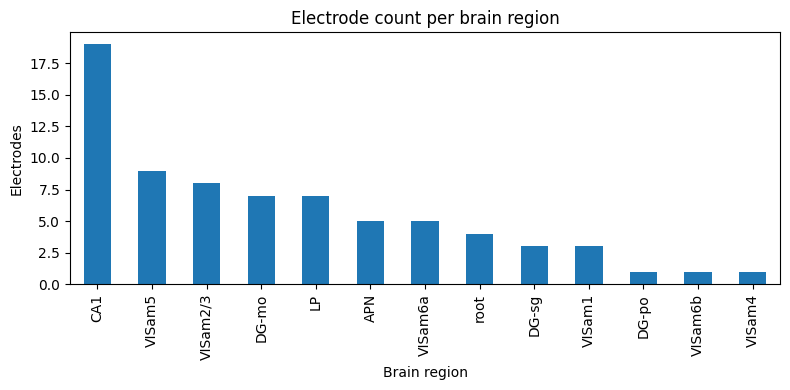

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

elec_tbl = nwb.electrodes
elec_df = elec_tbl.to_dataframe()
print("Electrode table columns:")
print(list(elec_df.columns))
print("First 5 rows:")
print(elec_df.head())

# Bar plot: number of electrodes per brain region
plt.figure(figsize=(8, 4))
region_counts = elec_df["location"].value_counts()
region_counts.plot(kind="bar")
plt.title("Electrode count per brain region")
plt.ylabel("Electrodes")
plt.xlabel("Brain region")
plt.tight_layout()
plt.show()

## 3. LFP Preview: Visualizing Example Traces

Here we plot the first 5 seconds of LFP from 5 example channels (evenly spaced from the 73 available).
Channel selection is for illustrative purposes; flat lines may indicate low signal or dead channels.

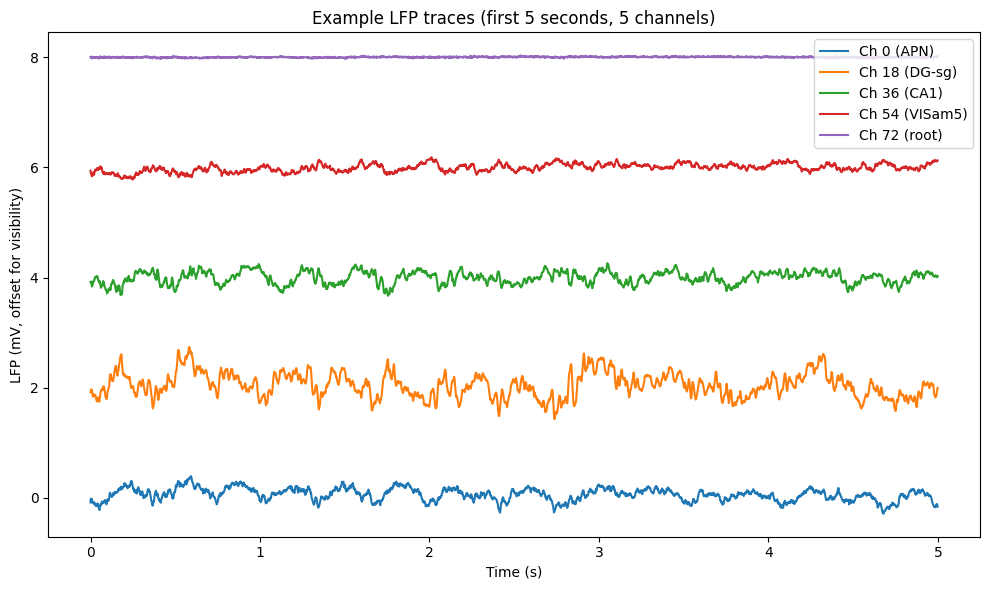

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 625
n_seconds = 5
n_samples = n_seconds * sample_rate
n_channels = elec_df.shape[0]
# Select 5 evenly spaced channels (spread throughout probe for anatomical diversity)
channels_to_plot = np.linspace(0, n_channels - 1, 5, dtype=int)
data = np.array(nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].data[:n_samples, channels_to_plot])
t = np.arange(n_samples) / sample_rate

plt.figure(figsize=(10, 6))
for i, ch in enumerate(channels_to_plot):
    plt.plot(t, data[:, i] * 1e3 + i * 2, label=f"Ch {ch} ({elec_df.iloc[ch]['location']})")  # mV and offset
plt.xlabel("Time (s)")
plt.ylabel("LFP (mV, offset for visibility)")
plt.title("Example LFP traces (first 5 seconds, 5 channels)")
plt.legend()
plt.tight_layout()
plt.show()

## 3b. LFP Heatmap: Mean LFP Value per Channel (Preview Segment)

Here we visualize the mean LFP in the 5-second preview window for each channel as a simple heatmap. Note that actual mapping to probe geometry would require additional metadata.

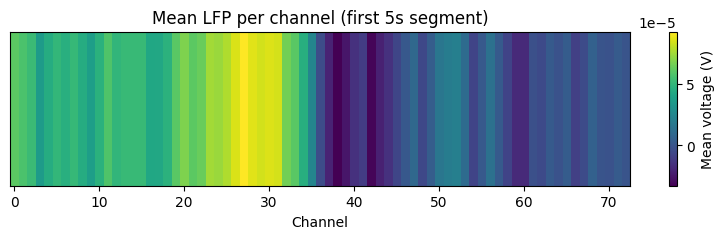

In [5]:
lfp_data_fullchan = np.array(nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].data[:n_samples, :])
mean_vals = lfp_data_fullchan.mean(axis=0)
plt.figure(figsize=(10,2))
plt.imshow(mean_vals[None, :], aspect="auto", cmap="viridis")
plt.yticks([])
plt.xlabel("Channel")
plt.title("Mean LFP per channel (first 5s segment)")
plt.colorbar(label="Mean voltage (V)")
plt.show()

## 3c. Spectrogram (Time-Frequency Analysis) of a Sample Channel

Power spectra are widely used to inspect neural oscillations. Below is a basic spectrogram for channel 0, preview segment.

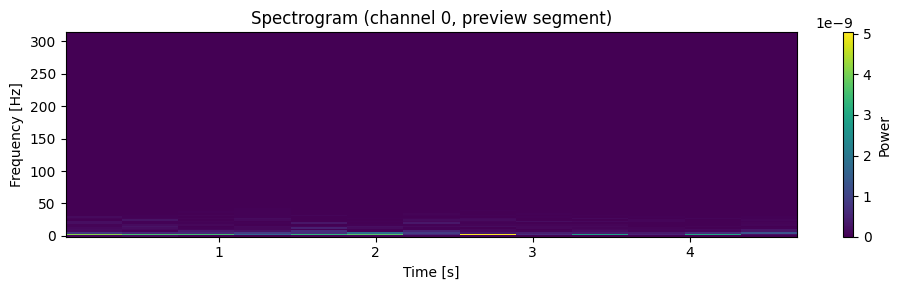

In [6]:
from scipy.signal import spectrogram

ch_idx = 0
f, t_spec, Sxx = spectrogram(lfp_data_fullchan[:, ch_idx], fs=sample_rate, nperseg=256)
plt.figure(figsize=(10, 3))
plt.pcolormesh(t_spec, f, Sxx, shading="auto")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram (channel 0, preview segment)')
plt.colorbar(label="Power")
plt.tight_layout()
plt.show()

## 4. Summary and Future Directions

This notebook demonstrated:
- Loading and summarizing Dandiset metadata and asset structure
- Streaming NWB neurophysiology files and interpreting their structure
- Inspecting and visualizing LFP data with trace, heatmap, and spectral approaches
- Examining anatomical/region-associated channel metadata

**Potential Next Steps**:
- Explore spikes/unit tables (if present) and their relation to LFP and stimulus events
- Analyze time-locked responses to visual stimuli (see stimulus_timestamps/notes where available)
- Extend anatomical mapping using full 3D probe/channel metadata
- Run more in-depth frequency or region-specific analyses, or connect data with the "barcoding" identification hypothesis described in the Dandiset

**Note:** Some advanced analyses may be limited by streaming speed and dataset complexity in this AI-generated example.

**Reminder:** This notebook was generated by an AI and should be carefully reviewed for correctness. The code and examples may require adaptation for other files or deeper scientific questions.